# 1.데이터 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

test = pd.read_csv("diabetes.csv",encoding='cp949')


In [2]:
x_data = test.drop('Outcome',1)
x_data

C:\Users\hp\AppData\Local\Temp/ipykernel_3212/2074189750.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_data = test.drop('Outcome',1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
y_data = test['Outcome']
y_data

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [4]:
x_train = x_data.to_numpy()
y_train = y_data.to_numpy()

In [5]:
x_normalized_data = x_train / np.max(x_train, axis=0)


(768,)

In [6]:
train_X = x_normalized_data[:600, :-1]
train_Y = y_train[:600]
test_X = x_normalized_data[600:, :-1]
test_Y = y_train[600:]


(600, 7)

In [7]:
model = keras.Sequential([keras.layers.Dense(7),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(256, activation="relu"),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer="adam", metrics=["accuracy"],
              loss="binary_crossentropy")
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(train_X, train_Y, epochs=50,
                   validation_data=(test_X, test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/50
19/19 [==============================] - 2s 17ms/step - loss: 0.6666 - accuracy: 0.6517 - val_loss: 0.6548 - val_accuracy: 0.6429
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 0.6505 - accuracy: 0.6533 - val_loss: 0.6375 - val_accuracy: 0.6429
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.6374 - accuracy: 0.6750 - val_loss: 0.6114 - val_accuracy: 0.6548
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.6733 - val_loss: 0.5766 - val_accuracy: 0.7262
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 0.5726 - accuracy: 0.7200 - val_loss: 0.5509 - val_accuracy: 0.6845
Epoch 6/50
19/19 [==============================] - 0s 9ms/step - loss: 0.5462 - accuracy: 0.7267 - val_loss: 0.5884 - val_accuracy: 0.7083
Epoch 7/50
19/19 [==============================] - 0s 8ms/step - loss: 0.5696 - accuracy: 0.7183 - val_loss: 0.506

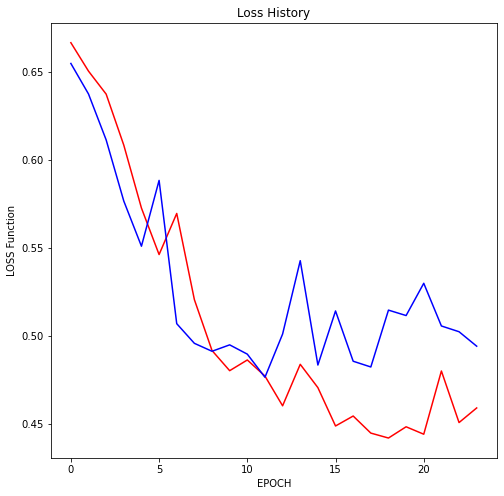

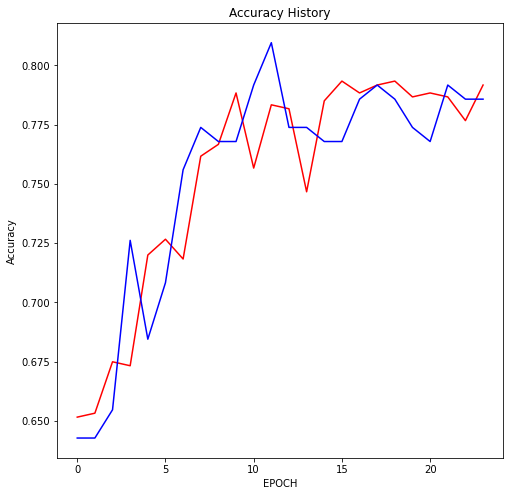

In [9]:
import matplotlib.pyplot as plt
def draw_graph(prediction, label, history):
    
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")
    
    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")
    
draw_graph(model(train_X), train_Y, history)

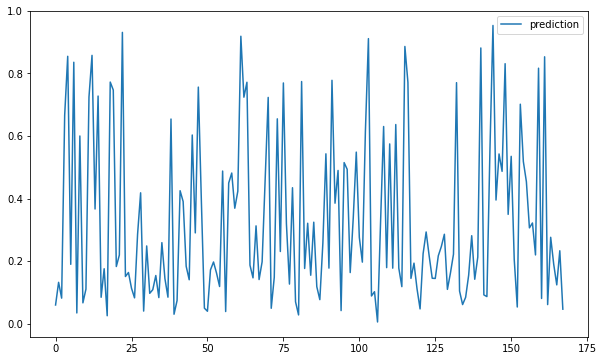

In [13]:
pred = model.predict(test_X)
plt.figure(figsize=(10,6))
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

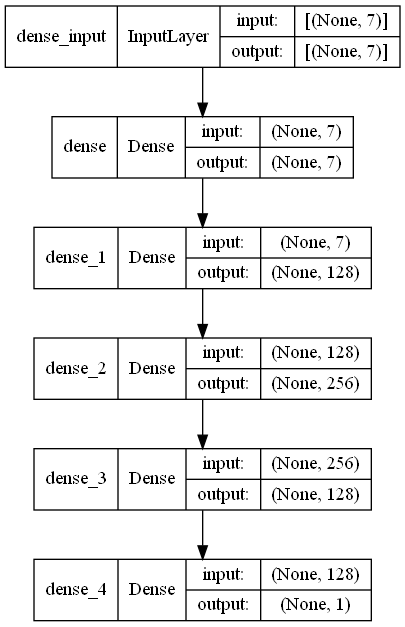

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)